In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
from IPython.display import Image
from pprint import pprint

In [ ]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
ox.config(log_console=True, use_cache=True)
ox.__version__

<ipython-input-4-3412207390b2>:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


'1.5.1'

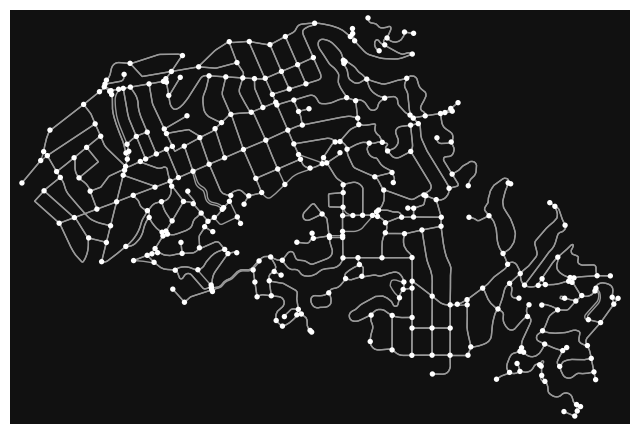

In [ ]:
#利福尼亚州皮埃蒙特的街道网络
G = ox.graph_from_place('Piedmont, California, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

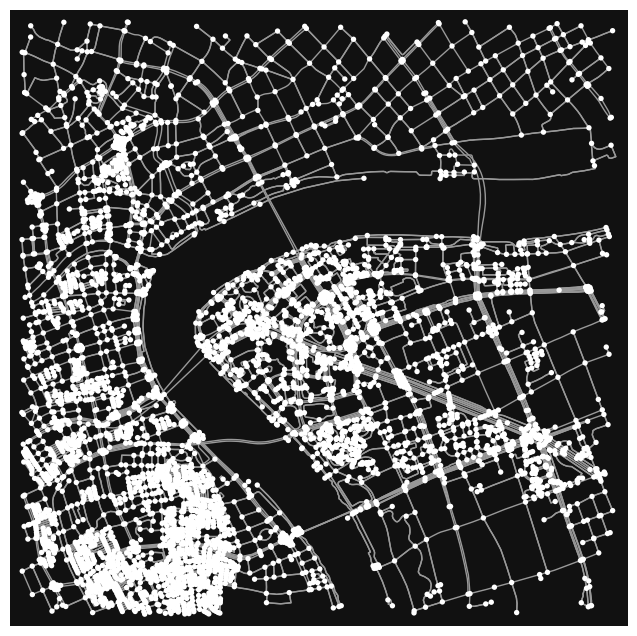

In [ ]:
Shanghai = ox.graph_from_bbox(31.26294625910883,31.218779943013374,121.52714698460449,121.47562572761075)
fig, ax = ox.plot_graph(Shanghai)

In [ ]:

# 下载自行车道路数据
graph = ox.graph_from_bbox(31.26294625910883,31.218779943013374,121.52714698460449,121.47562572761075, network_type='bike')

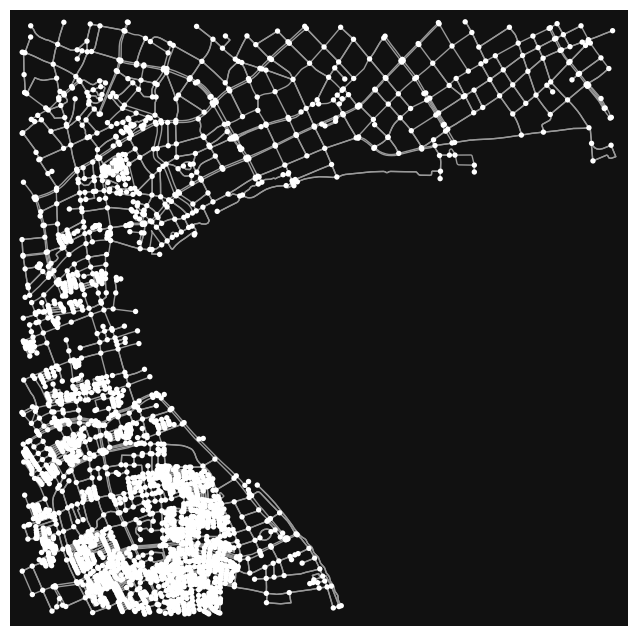

In [ ]:
fig, ax = ox.plot_graph(graph)

# 2.计算网络指标

In [ ]:
# 将图形投影到平面坐标系
G_proj = ox.project_graph(G)

# 将投影后的节点转换为 GeoDataFrame
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# 计算节点凸包的面积（以平方米为单位）
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

4199283.565369835

In [ ]:

# 使用ox.basic_stats()函数计算基本的网络统计信息，并打印出来
stats = ox.basic_stats(G_proj,area=graph_area_m)

pprint(stats)


{'circuity_avg': 1.1111976576982412,
 'edge_density_km': 26681.000998353076,
 'edge_length_avg': 118.18680274261627,
 'edge_length_total': 112041.08900000023,
 'intersection_count': 319,
 'intersection_density_km': 75.96533909514763,
 'k_avg': 5.371104815864022,
 'm': 948,
 'n': 353,
 'node_density_km': 84.0619583090505,
 'self_loop_proportion': 0.006036217303822937,
 'street_density_km': 13831.95683163742,
 'street_length_avg': 116.86983702213286,
 'street_length_total': 58084.30900000003,
 'street_segment_count': 497,
 'streets_per_node_avg': 2.951841359773371,
 'streets_per_node_counts': {0: 0, 1: 34, 2: 0, 3: 270, 4: 47, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
                                  1: 0.09631728045325778,
                                  2: 0.0,
                                  3: 0.7648725212464589,
                                  4: 0.13314447592067988,
                                  5: 0.0056657223796034}}


In [ ]:
print(nx.is_directed(G_proj))
undirected_graph= G_proj.to_undirected()
circuity_avg = round(ox.stats.circuity_avg(undirected_graph),1)
circuity_avg

True


1.1

In [ ]:
closeness = nx.closeness_centrality(G_proj)
closeness_max = max(closeness.values())
closeness_max

0.08629066538199955

In [ ]:

ox.save_graph_shapefile(G,filepath="./sample_data/myshapefile")


<ipython-input-13-834671308dda>:1: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.save_graph_shapefile(G,filepath="./sample_data/myshapefile")
/usr/local/lib/python3.10/dist-packages/osmnx/io.py:116: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [ ]:
import zipfile
import os
folder_path = './sample_data/myshapefile'
zip_path = './sample_data/myshapefile.zip'

# 创建 ZipFile 对象，并递归地将文件夹中的所有内容添加到 zip 文件中
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

**3. 可视化街道中心性**

In [ ]:
# 将道路网络G转换为折线图
line_graph = nx.line_graph(G)
# 计算折线图中各个节点的接近中心性
edge_centrality = nx.closeness_centrality(line_graph)


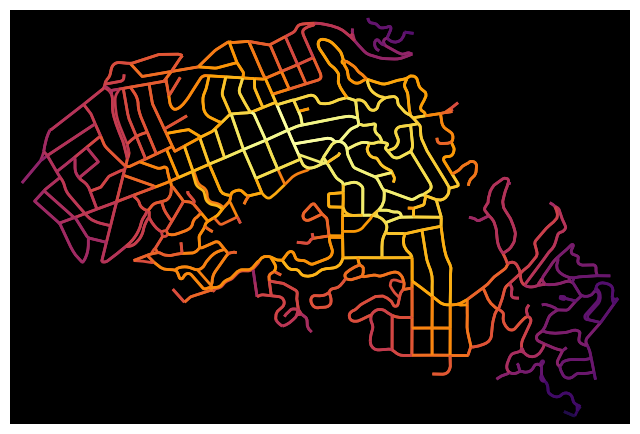

In [ ]:
# 创建一个包含图形边缘中心性值的列表
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# 创建一个颜色比例尺，并将其转换为用于图形边缘的颜色列表
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# 在原始图形中，通过在折线图中使用接近中心性来给边缘上色
fig, ax = ox.plot_graph(G, bgcolor='black', node_size=0,edge_color=ec, edge_linewidth=2, edge_alpha=1)

# 网络路径

In [ ]:
#图中的任意两点
#查找图中距离他们最近的节点ID
route = ox.distance.nearest_nodes(G, (37.825956, -122.242278), (37.817180, -122.218078), return_dist=False)
route

[53065785, 53035698]

In [ ]:
orig = 53065785
dest = 53035698
route1=ox.distance.shortest_path(G, orig, dest, weight='length', cpus=1)

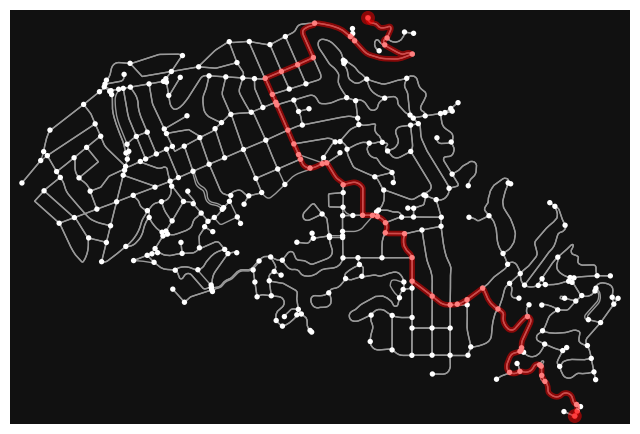

In [ ]:
fig, ax = ox.plot.plot_graph_route(G, route1, route_color='r')


In [ ]:
net_dist = nx.shortest_path_length(G, orig, dest, weight='length', method='dijkstra')
net_dist

5033.749000000001

**其他下载方式**

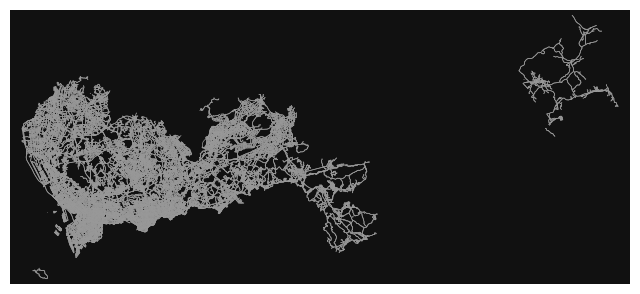

In [ ]:
G = ox.graph_from_place('Shenzhen, China', retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)


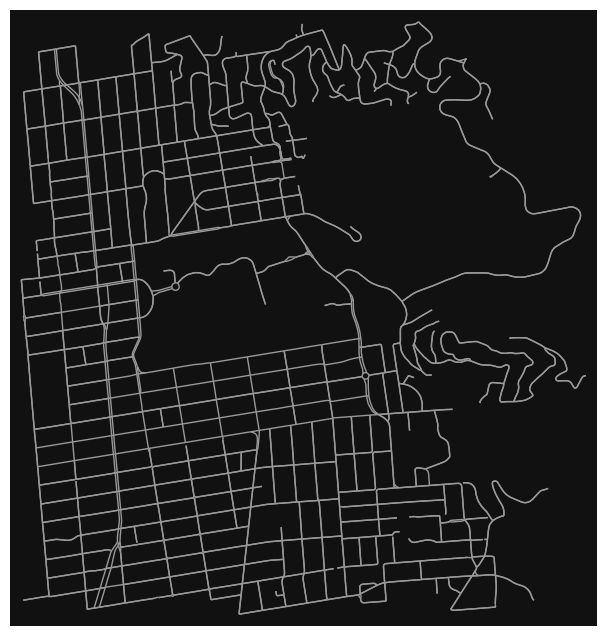

In [ ]:
# create a graph around UC Berkeley then plot it
UCB = (37.870605, -122.254830)
one_Km = 1000 #one mile in meters
G = ox.graph_from_point(UCB, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G, node_size=0)

In [ ]:
place = {'city': 'Nanjing',
      'state':'Jiangsu',
      'country':'China'}
G = ox.graph_from_place(place, network_type='drive')

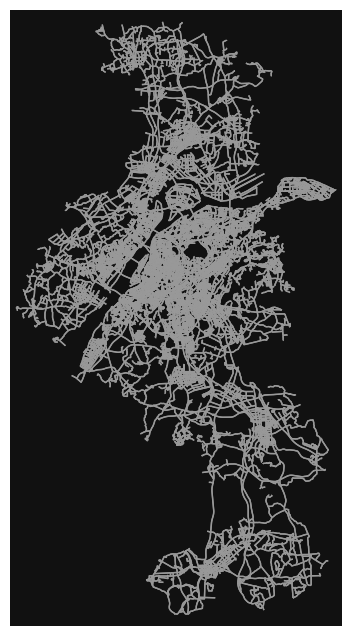

In [ ]:
fig, ax = ox.plot_graph(G, node_size=0)

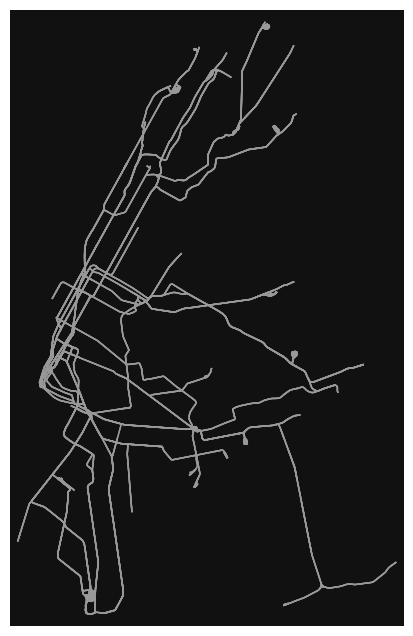

In [ ]:

G = ox.graph_from_place('New York City, New York, USA',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        network_type='none', custom_filter ='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=0)

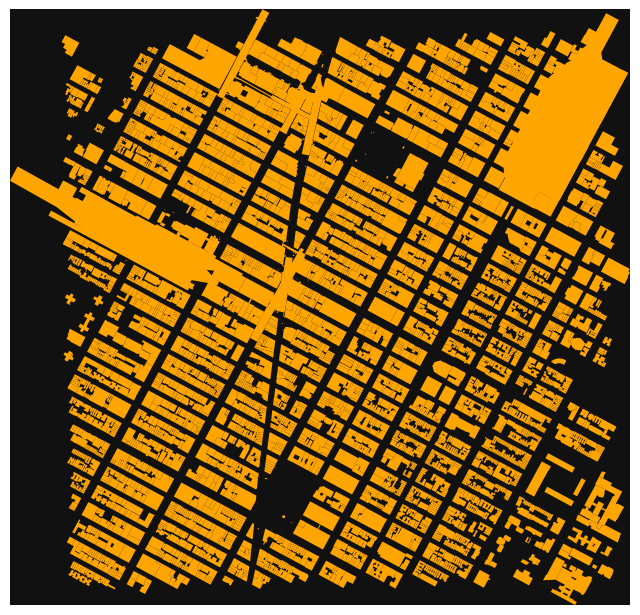

In [ ]:
# download and visualize the building footprints around the empire state bldg
point = (          121.49607773417989,
          31.2403100471993) #empire state bldg coordinates
dist = 1000 #meters
place_name = "Empire State Building, New York City, USA"

gdf = ox.features.features_from_address(address=place_name, tags={"building": True}, dist=dist)

gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_footprints(gdf_proj,dpi=600)